<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [3]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [4]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [6]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [7]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [8]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [9]:
age_categories = [age_category(age) for age in data.Age]

In [10]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [11]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- ___577 мужчин и 314 женщин___

In [13]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- ___108___
- 112
- 125

In [14]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
data[data['Sex'] == 'female']['Pclass'].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

In [22]:
data[data['Sex'] == 'male']['Pclass'].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- ___Медиана – 14.45, стандартное отклонение – 49.69___
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [28]:
round(data['Fare'].median(), 2)

14.45

In [29]:
round(data['Fare'].std(), 2)

49.69

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- ___40.6% среди молодых и 22.7% среди старых___
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [60]:
data[(data['Age'] < 30) & (data['Survived'] == 1)].shape[0] > data[(data['Age'] > 60) & (data['Survived'] == 1)].shape[0]

True

In [61]:
#youngsters
100 * data[(data['Age'] < 30) & (data['Survived'] == 1)].shape[0] / data[(data['Age'] < 30)].shape[0]

40.625

In [62]:
#olds
100 * data[(data['Age'] > 60) & (data['Survived'] == 1)].shape[0] / data[(data['Age'] > 60)].shape[0]

22.727272727272727

**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- ___18.9% среди мужчин и 74.2% среди женщин___

In [64]:
data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0] > data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0]

True

In [65]:
#females
100 * data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0] / data[(data['Sex'] == 'female')].shape[0]

74.20382165605096

In [66]:
#males
100 * data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0] / data[(data['Sex'] == 'male')].shape[0]

18.890814558058924

**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- ___William___
- John

In [77]:
data[data['Sex'] == 'male']['Name'].value_counts()[:3]

Coutts, Master. William Loch "William"    1
Gilinski, Mr. Eliezer                     1
Gillespie, Mr. William Henry              1
Name: Name, dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- ___Да___ 
- Нет

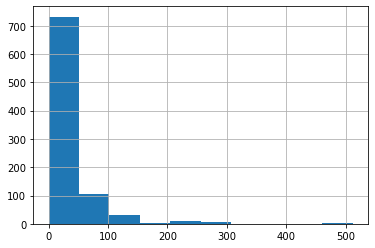

In [80]:
data['Fare'].hist();

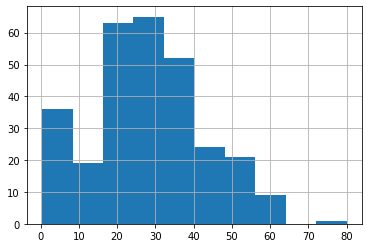

In [86]:
data[data['Survived'] == 1]['Age'].hist();

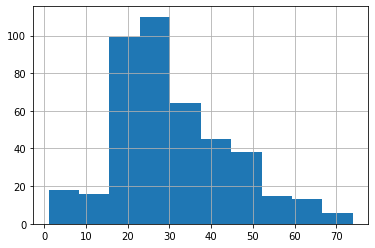

In [87]:
data[data['Survived'] == 0]['Age'].hist();

In [90]:
data[data['Survived'] == 0]['Age'].mean() > data[data['Survived'] == 1]['Age'].mean()

True

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- ___В среднем мужчины 1-го класса старше 40 лет___
- В среднем женщины 1-го класса старше 40 лет
- ___Мужчины всех классов в среднем старше женщин того же класса___
- ___В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса___

In [97]:
#1
data[(data['Pclass'] == 1) & (data['Sex'] == 'male')]['Age'].mean() > 40

True

In [98]:
#2
data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]['Age'].mean() > 40

False

In [99]:
#3
for i in range(1, 4):
    print(data[(data['Pclass'] == i) & (data['Sex'] == 'male')]['Age'].mean() > \
          data[(data['Pclass'] == i) & (data['Sex'] == 'female')]['Age'].mean())

True
True
True


In [100]:
#4
data[data['Pclass'] == 1]['Age'].mean() > data[data['Pclass'] == 2]['Age'].mean()

True

In [101]:
#4
data[data['Pclass'] == 2]['Age'].mean() > data[data['Pclass'] == 3]['Age'].mean()

True